# Text Mining

In [1]:
 #!pip install spacy

In [2]:
#!python -m spacy download en_core_web_sm


In [3]:
#!pip install wordcloud

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
from wordcloud import WordCloud,STOPWORDS


In [5]:
elon_musk=pd.read_csv("Elon_musk.csv",encoding='cp1252')

# EDA

In [6]:
elon_musk

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


#### Remove both the leading and the trailing characters

In [7]:
df_text=[y.strip() for y in elon_musk["Text"]]

#### Removes empty strings, because they are considered in Python as False

In [8]:
df_text=[x for x in df_text if x]
df_text[0:5]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

#### Taking user names to different variable

In [9]:
user=[] ### User names
for a in df_text:
    li=[]
    x=a.split()
    for b in x:
        if b[0]=="@":
            li.append(b)
    text=" ".join(li)
    user.append(text)


#### Removing User Names starting with @ and removing links

#### Data also contain <>, we need to remove it

In [10]:
new_df=[]
for a in df_text:
    li=[]
    x=a.split()
    for b in x:
        if b[0]!="@" and b[0:4]!="http" and b[0]!="<":
            li.append(b)
    text=" ".join(li)
    new_df.append(text)

In [11]:
new_df[0:5]

['I’m an alien',
 'Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 'Great interview!',
 'Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

#### Removing Punctuation

In [12]:
no_punctuation_text=[]
for text in new_df:
    x=text.translate(str.maketrans('', '', string.punctuation))
    no_punctuation_text.append(x)

In [13]:
no_punctuation_text[0:5]

['I’m an alien',
 'Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it',
 'Great interview',
 'Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year Now on to the next for even more']

In [14]:
complete_text=" ".join(no_punctuation_text)

In [15]:
complete_text

'I’m an alien Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox Frodo was the underdoge All thought he would fail Himself most of all Haha thanks  Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account  This is true power haha Any crypto wallet that won’t give you your private keys should be avoided at all costs Your app sucks RT NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission Yes Once we can predict cash flow reasonably well Starlink will IPO Starlink is a staggeringly

#### Tokenization

In [16]:
!pip install gensim

In [17]:
from gensim.utils import tokenize
tokenized=list(tokenize(complete_text))

#### Removing stop words

In [18]:
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

In [19]:
sw_removed=[]
for i in tokenized:
    if i in sw_spacy:
        "do nothing"
    else:
        sw_removed.append(i)

#### Normalizing the data

In [20]:
lower_text=[x.lower() for x in sw_removed]

In [21]:
lower_text[0:10]

['i',
 'm',
 'alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried']

#### Stemming (Optional)

In [22]:
#!pip install nltk

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [25]:
stemmed=[ps.stem(word) for word in lower_text]

In [26]:
stemmed[0:10]

['i',
 'm',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri']

#### Lemmas

In [27]:
doc = en(' '.join(lower_text))

In [28]:
lemmas=[token.lemma_ for token in doc]
lemmas

['I',
 'm',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'year',
 'now',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'think',
 'fail',
 'himself',
 'haha',
 'thank',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'just',
 'send',
 'just',
 'agree',
 'clubhouse',
 'it',
 's',
 'get',
 'real',
 'buy',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definitely',
 'issue',
 'sentence',
 'bit',
 'high',
 'thank',
 'fix',
 'please',
 'unlock',
 'account',
 'this',
 'true',
 'power',
 'haha',
 'any',
 'crypto',
 'wallet',
 'win',
 't',
 'private',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavy',
 'launch',
 'element',
 'lunar',
 'gateway',
 'mission',
 'yes',
 'once',


In [29]:
len(lemmas)

10801

## Feature Extraction

#### Count Vectorizer

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [31]:
vectorizer.vocabulary_

{'alien': 85,
 'ray': 2222,
 'trace': 2869,
 'cyberpunk': 651,
 'hdr': 1233,
 'nextlevel': 1834,
 'have': 1228,
 'try': 2900,
 'great': 1181,
 'interview': 1430,
 'doge': 777,
 'underestimated': 2945,
 'congratulation': 557,
 'tesla': 2779,
 'china': 468,
 'amazing': 104,
 'execution': 940,
 'year': 3158,
 'now': 1862,
 'happy': 1216,
 'new': 1831,
 'ox': 1961,
 'frodo': 1085,
 'underdoge': 2944,
 'all': 87,
 'think': 2811,
 'fail': 973,
 'himself': 1276,
 'haha': 1204,
 'thank': 2789,
 'indeed': 1372,
 'tweet': 2918,
 'definitely': 688,
 'represent': 2289,
 'realworld': 2237,
 'time': 2831,
 'allocation': 89,
 'the': 2794,
 'entertaining': 886,
 'outcome': 1940,
 'likely': 1572,
 'just': 1474,
 'send': 2431,
 'agree': 69,
 'clubhouse': 497,
 'it': 1451,
 'get': 1143,
 'real': 2233,
 'buy': 388,
 'dogecoin': 779,
 'lil': 1573,
 'toddler': 2843,
 'hodler': 1282,
 'he': 1234,
 'issue': 1449,
 'sentence': 2435,
 'bit': 302,
 'high': 1266,
 'fix': 1033,
 'please': 2054,
 'unlock': 2969,
 '

In [32]:
df_countvectorizer=pd.DataFrame.from_records([vectorizer.vocabulary_]).T

In [33]:
df_countvectorizer

,0
alien,85
ray,2222
trace,2869
cyberpunk,651
hdr,1233
...,...
social,2546
click,490
samwise,2377
gamgee,1117


#### Bigram tri-gram

In [34]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,3))
                                         
                                         #max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(lemmas)
bow_matrix_ngram

<10801x3178 sparse matrix of type '<class 'numpy.int64'>'
	with 10237 stored elements in Compressed Sparse Row format>

In [35]:
print(vectorizer_ngram_range.get_feature_names())

['aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertising', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aiautopilot', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'all', 'allocati', 'allocation', 'allow', 'alloy', 'almost', 'aloha', 'alpha', '

E:\Anaconda\anaconda3\envs\Custom\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TFidf vectorizer

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",
                                                 analyzer='word',
                                                 ngram_range=(1,3),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(lemmas)
tf_idf_matrix_n_gram_max_features

<10801x100 sparse matrix of type '<class 'numpy.float64'>'
	with 3316 stored elements in Compressed Sparse Row format>

In [38]:
print(vectorizer_n_gram_max_features.get_feature_names())

['actually', 'also', 'amp', 'beta', 'big', 'booster', 'build', 'car', 'come', 'complete', 'cool', 'crew', 'day', 'design', 'don', 'dragon', 'earth', 'engine', 'exactly', 'falcon', 'feel', 'fire', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'just', 'land', 'launch', 'life', 'like', 'long', 'look', 'lot', 'love', 'make', 'maybe', 'mission', 'model', 'month', 'need', 'new', 'no', 'not', 'ok', 'orbit', 'people', 'point', 'pretty', 'probably', 'product', 'production', 'right', 'rocket', 'rt', 'sn', 'soon', 'sound', 'space', 'spacex', 'starlink', 'starship', 'start', 'super', 'sure', 'team', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'thing', 'think', 'this', 'time', 'true', 'try', 'use', 'way', 'we', 'week', 'well', 'what', 'will', 'work', 'wow', 'yeah', 'year', 'yes', 'you']


In [39]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
pd.DataFrame(tf_idf_matrix_n_gram_max_features.toarray(),
            columns = vectorizer_n_gram_max_features.get_feature_names())

,actually,also,amp,beta,big,booster,build,car,come,complete,...,week,well,what,will,work,wow,yeah,year,yes,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Generate wordcloud

In [41]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    # Set figure size
    plt.figure(figsize=(60, 40))

    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off")

In [42]:
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')

In [43]:
wordcloud = WordCloud(width = 3000, 
                      height = 2000,
                      background_color = 'black',
                      max_words = 100,
                      colormap = 'Set2',
                      stopwords = stopwords).generate(complete_text)

<Figure size 600x400 with 0 Axes>

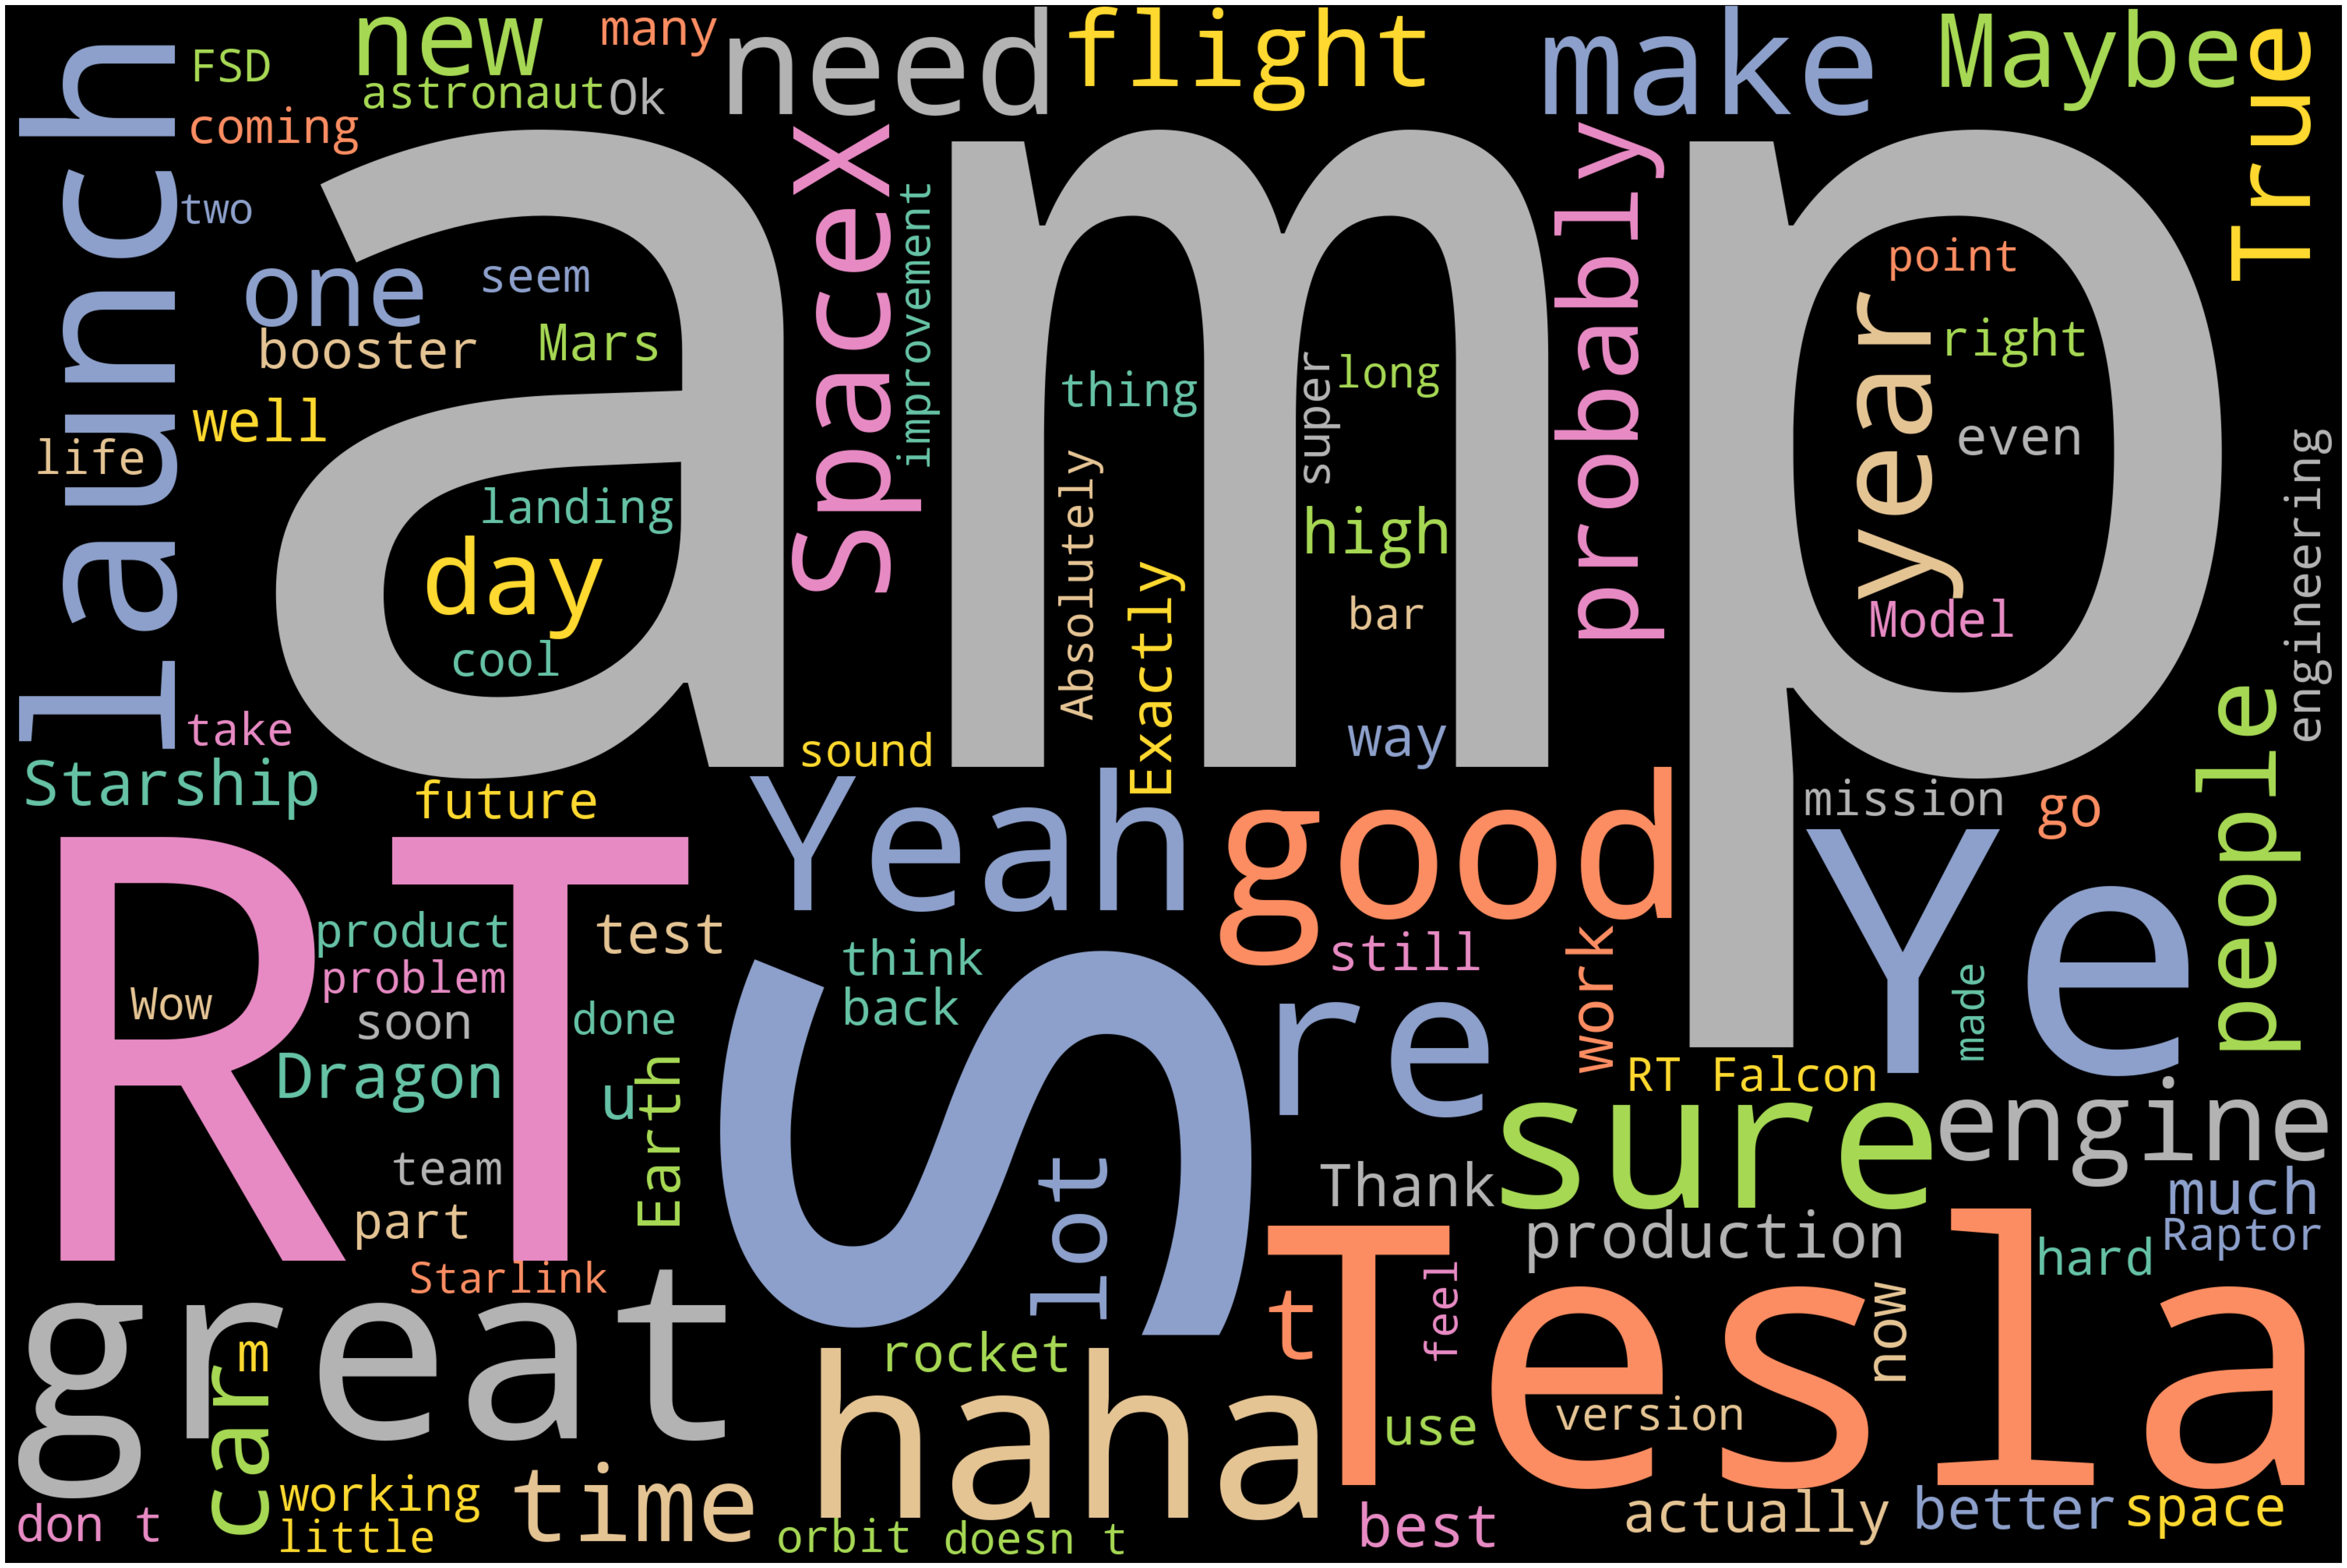

In [44]:
plt.figure(figsize = (6,4))
plot_cloud(wordcloud)
plt.show()

### Named Entity Recognition (NER)

In [45]:
nlp = spacy.load('en_core_web_sm')

In [46]:
doc_block = nlp(complete_text)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

#### Emotion Mining

In [47]:
#Sentiment analysis
negative = open("negative-words.txt","r")
negative_word=negative.read()
negative.close()

In [48]:
negative_word=negative_word.strip()
neg_list=negative_word.split(sep='\n')

In [49]:
positive =open("positive-words.txt","r")
positive_word=positive.read()
positive.close()

In [50]:
positive_word=positive_word.strip()
pos_list=positive_word.split(sep='\n')

In [51]:
pos_list[0:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [52]:
neg_list[0:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [53]:
sentiment_list=[]
for sentence in no_punctuation_text:
    word_list=sentence.split(" ")
    sentiment=0
    for word in word_list:
        if word in pos_list:
            sentiment+=1
        if word in neg_list:
            sentiment-=1
    if sentiment>0:
        sentiment_list.append("Positive")
    elif sentiment<0:
        sentiment_list.append("Negative")
    else:
        sentiment_list.append("Nutral")

        

In [54]:
sentiments_df=pd.DataFrame({"Comments":no_punctuation_text,"Sentiment":sentiment_list})

In [55]:
sentiments_df.head(10)

,Comments,Sentiment
0,I’m an alien,Nutral
1,Ray tracing on Cyberpunk with HDR is nextlevel...,Nutral
2,Great interview,Nutral
3,Doge is underestimated,Nutral
4,Congratulations Tesla China for amazing execut...,Positive
5,Happy New Year of the Ox,Nutral
6,Frodo was the underdoge All thought he would f...,Negative
7,Haha thanks,Nutral
8,Indeed Tweets definitely do not represent real...,Nutral
9,The most entertaining outcome is the most likely,Positive


<AxesSubplot:>

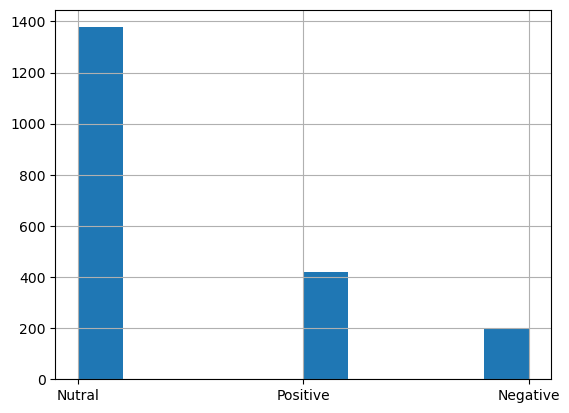

In [56]:
sentiments_df["Sentiment"].hist()